In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 3.4 ms (started: 2024-08-09 12:54:12 +00:00)


In [9]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.52 s (started: 2024-08-09 12:54:13 +00:00)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.29 s (started: 2024-08-09 12:54:16 +00:00)


In [11]:
from google.colab import files
import os
import shutil

os.makedirs('/content/data', exist_ok=True)

# Copy the data files from Google Drive to Colab

shutil.copy('/content/drive/MyDrive/THESIS/classifiers/data/data_p9_preprocessed.csv', '/content/data/data_p9_preprocessed.csv')

# Copy scripts from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/feature_selectors.py', '/content/feature_selectors.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/knn_classifier.py', '/content/knn_classifier.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/utils.py', '/content/utils.py')

'/content/utils.py'

time: 12.3 s (started: 2024-08-09 12:54:19 +00:00)


# Phonation Mode KNN Classification

This classification is just for 2 phonation modes (for the partciipant used for building this model) and might need extending based on the participant used. This would also require labelleing unlabelled participants phonation modes.

Using multilayer perceptron model could prove better for more complex classification tasks. Used in Furkan thesis/paper in phonation mode classification. However, since phonation is only using 2 classes, the MLP is forth developed for the recording condition classification task.

As the phonation classification for this is simply a 2 way classification task, a KNN should be sufficient for the task. Therefore it is the forst thing tested. However, of course should the phonation modes supported increase, then the classification task would become more complex and using a simple KNN would liekly not suffice.

In [12]:
RANDOM_STATE = 42
DATA_FILE = 'data/data_p9_preprocessed.csv'

from knn_classifier import train_and_test_knn, evaluate_model
from utils import prepare_data, plot_confusion_matrix, calculate_metrics_2_class, remove_specified_conditions
from sklearn.model_selection import train_test_split

time: 3.39 s (started: 2024-08-09 12:54:31 +00:00)


## 1. Complete data

Accuracy:  0.9602
Returned F1 score:  0.9602
Precision:  0.9523
Recall:  0.9725
Specificity:  0.9468
False positive rate:  0.0532


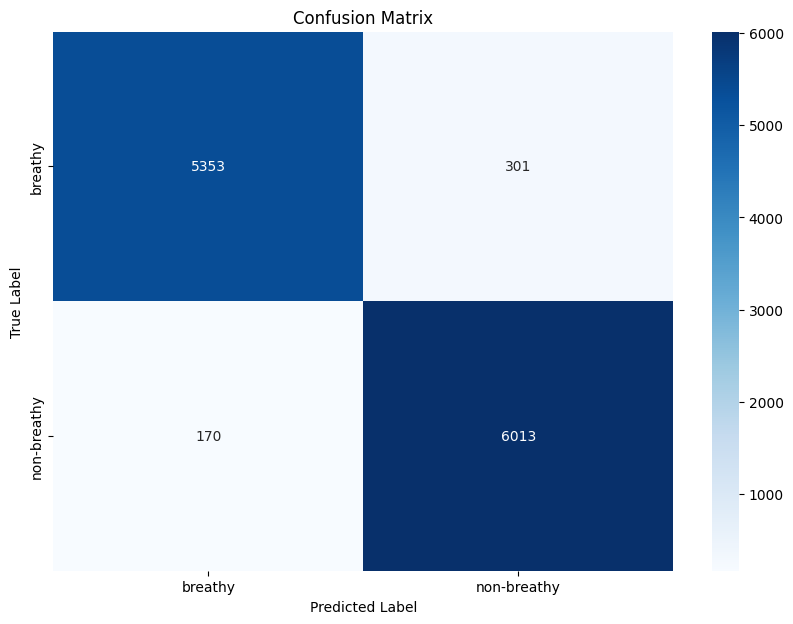

time: 25.1 s (started: 2024-08-09 12:54:35 +00:00)


In [13]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn')
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)


#### Top 5 features only

Selected features:  Index(['computer_pose_landmark_5_z', 'computer_pose_landmark_6_z',
       'computer_pose_landmark_7_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_11_z'],
      dtype='object')
Accuracy:  0.9626
Returned F1 score:  0.9626
Precision:  0.9593
Recall:  0.9694
Specificity:  0.9551
False positive rate:  0.0449


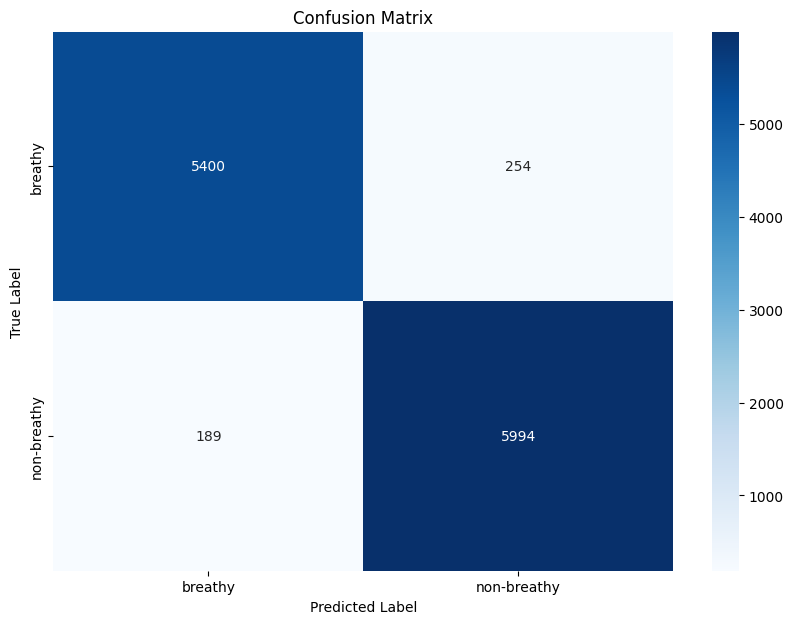

time: 5.17 s (started: 2024-08-09 12:55:00 +00:00)


In [14]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

The automatic feature selection is not robust enough, because it doesn't understand the data. Unfortunately the positioning of the camera for the two phonation conditions is slightly different, meaning that the lower limb points are or are not visible more depending on thephonation mode condition.

Therefore, feature selection must be done after disregarding the lower

## 2. Audio Only

In [15]:
modalities = [
    "audio"
]

time: 1.09 ms (started: 2024-08-09 12:55:05 +00:00)


#### All audio features

Accuracy:  0.7893
Returned F1 score:  0.7894
Precision:  0.8088
Recall:  0.7813
Specificity:  0.798
False positive rate:  0.202


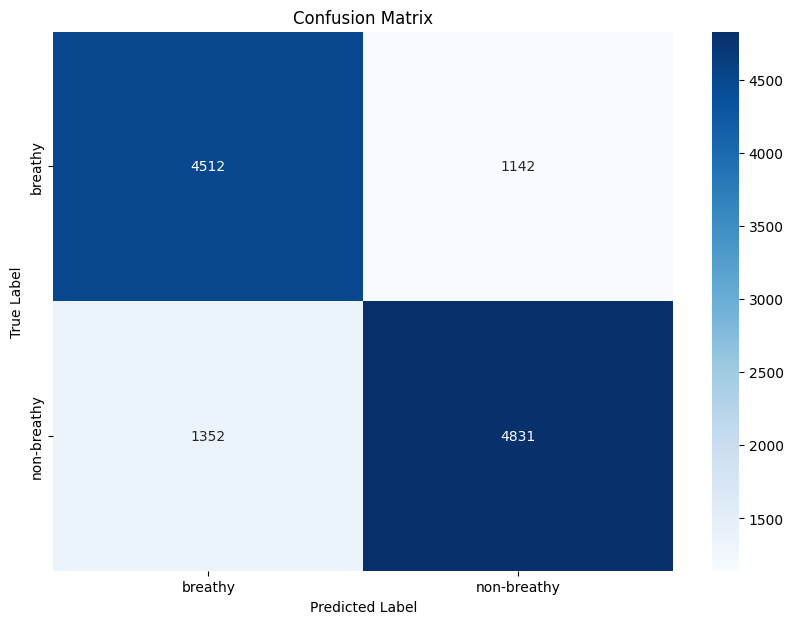

time: 9.98 s (started: 2024-08-09 12:55:05 +00:00)


In [16]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 audio features

Selected features:  Index(['computer_spec_slope', 'computer_spec_decr', 'computer_tristimulus1',
       'computer_mfcc_1', 'computer_mfcc_3'],
      dtype='object')
Accuracy:  0.7363
Returned F1 score:  0.7363
Precision:  0.7494
Recall:  0.7438
Specificity:  0.728
False positive rate:  0.272


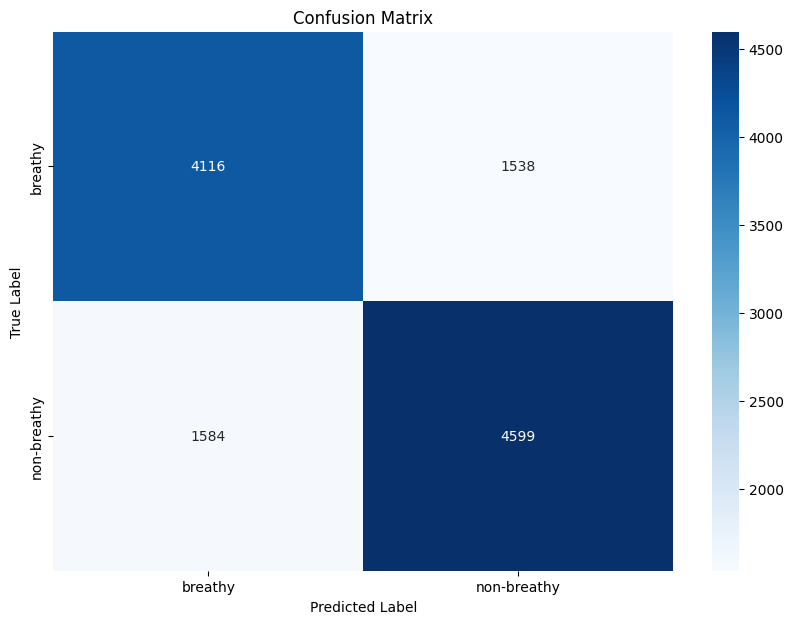

time: 4.4 s (started: 2024-08-09 12:55:15 +00:00)


In [17]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 3. Video Only

In [18]:
modalities = [
    "video"
]

time: 876 µs (started: 2024-08-09 12:55:19 +00:00)


Accuracy:  1.0
Returned F1 score:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
False positive rate:  0.0


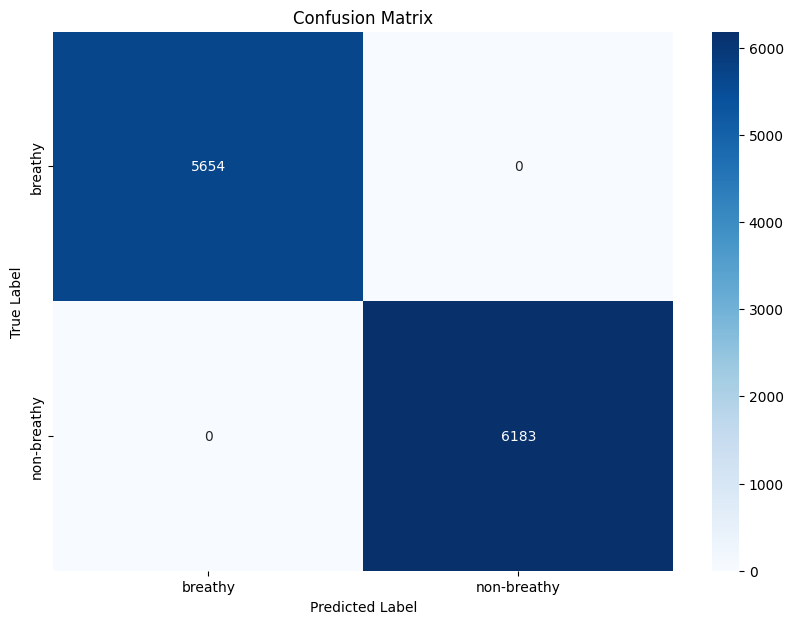

time: 18.3 s (started: 2024-08-09 12:55:19 +00:00)


In [19]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 video features

Selected features:  Index(['computer_pose_landmark_5_z', 'computer_pose_landmark_6_z',
       'computer_pose_landmark_7_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_11_z'],
      dtype='object')
Accuracy:  0.9626
Returned F1 score:  0.9626
Precision:  0.9593
Recall:  0.9694
Specificity:  0.9551
False positive rate:  0.0449


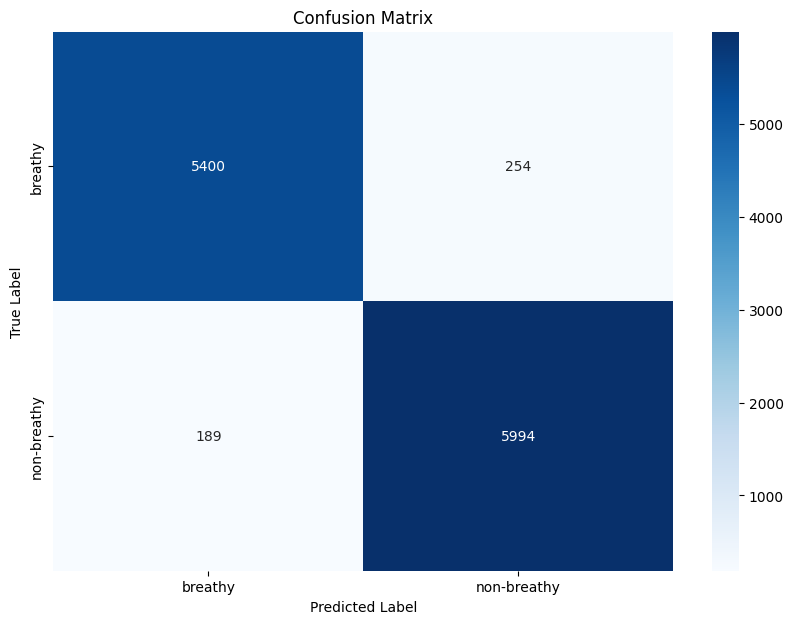

time: 7.38 s (started: 2024-08-09 12:55:38 +00:00)


In [20]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 4. Biosignal Data Only

In [21]:
modalities = [
    "biosignals"
]

time: 1.98 ms (started: 2024-08-09 12:55:45 +00:00)


Accuracy:  0.5234
Returned F1 score:  0.5227
Precision:  0.5421
Recall:  0.5649
Specificity:  0.4781
False positive rate:  0.5219


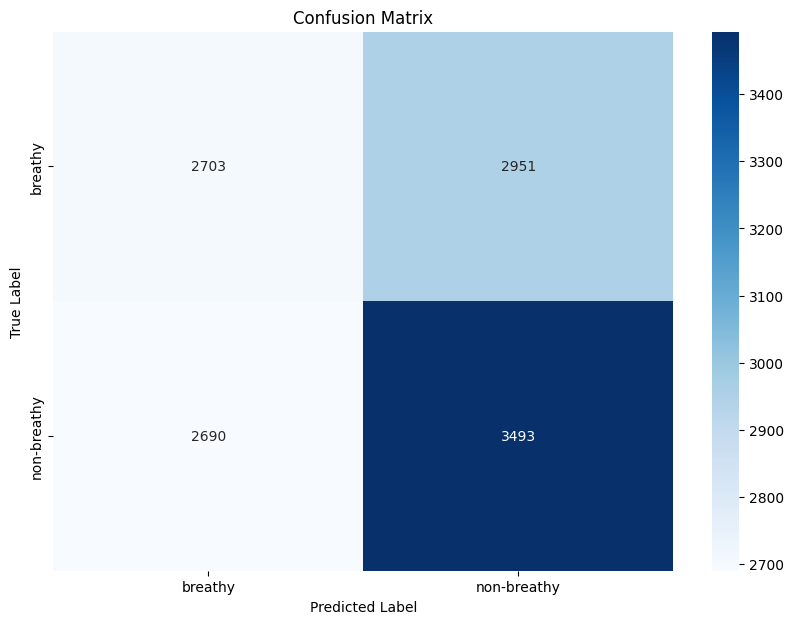

time: 4.28 s (started: 2024-08-09 12:55:45 +00:00)


In [22]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)